![](../src/logo.svg)

**© Jesús López**

Ask him any doubt on **[Twitter](https://twitter.com/jsulopz)** or **[LinkedIn](https://linkedin.com/in/jsulopz)**

<a href="https://colab.research.google.com/github/jsulopz/resolving-machine-learning/blob/main/05_Cluster%20Analysis%20con%20k-Means/05_clustering-kmeans_practice_solution.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# 05 | Cluster Analysis with k-Means

## Load the Data

- Simply execute the following lines of code to load the data
- This dataset contains **statistics** (columns)
- About **Car Models** (rows)

In [1]:
import seaborn as sns #!

df_mpg = sns.load_dataset(name='mpg', index_col='name')
df_mpg.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
name,,,,,,,,
ford country,12.0,8,400.0,167.0,4906,12.5,73,usa
dodge aspen,19.1,6,225.0,90.0,3381,18.7,80,usa
pontiac phoenix,33.5,4,151.0,90.0,2556,13.2,79,usa
ford mustang ii 2+2,25.5,4,140.0,89.0,2755,15.8,77,usa
dodge aries se,29.0,4,135.0,84.0,2525,16.0,82,usa


## Feature Selection

- Select 2 columns for the modelling

In [91]:
df_select = df_mpg[['acceleration', 'model_year']]

## Data `preprocessing`

- Do you need to *transform* the data
- To get a **truthful insight** of the model?

In [92]:
from sklearn.preprocessing import MinMaxScaler

In [93]:
scaler = MinMaxScaler()

In [94]:
import pandas as pd

In [95]:
df_scaled= pd.DataFrame(scaler.fit_transform(X=df_select))

## `KMeans()` Model in Python

### Fit the Model

- To cluster 3 groups

In [96]:
from sklearn.cluster import KMeans

In [97]:
model_km= KMeans(n_clusters=3)

In [98]:
model_km.fit(X=df_scaled)

C:\Users\User\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=3)

### Calculate Predictions

In [99]:
df_scaled

,0,1
0,0.238095,0.0
1,0.208333,0.0
2,0.178571,0.0
3,0.238095,0.0
4,0.148810,0.0
...,...,...
393,0.452381,1.0
394,0.988095,1.0
395,0.214286,1.0
396,0.630952,1.0


In [100]:
model_km.predict(X=df_scaled)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0,
       2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

### Create a New DataFrame for the Predictions

In [101]:
df_pred = df_select.reset_index(drop=True)

In [103]:
df_pred['pred_km'] = model_km.predict(X=df_scaled)


### Visualize the Model

- You colour the points with the the value of the predictions

<AxesSubplot: xlabel='acceleration', ylabel='model_year'>

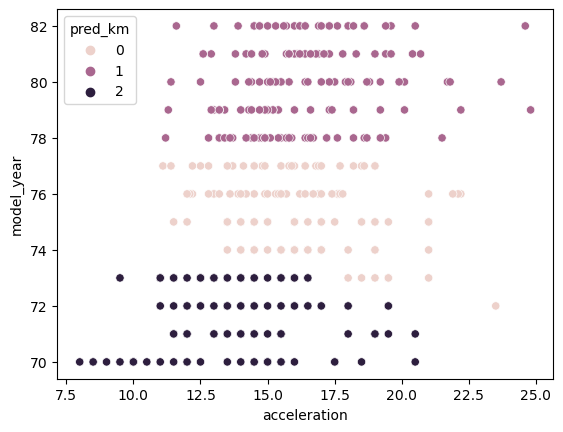

In [105]:
sns.scatterplot(data=df_pred,x='acceleration', y='model_year', hue='pred_km')

## Other `Clustering` Models in Python

- Visit the `sklearn` website [here ↗](https://scikit-learn.org/stable/)
- **Pick 2 new models** and compute the *Clustering*

### Other Model 1

#### Fit the Model

- To cluster 3 groups

In [106]:
from sklearn.cluster import SpectralClustering

In [107]:
model_sc= SpectralClustering(n_clusters=3)

In [108]:
model_sc.fit(X=df_pred.drop(columns='pred_km'))

C:\Users\User\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


SpectralClustering(n_clusters=3)

#### Calculate Predictions

In [112]:
df_pred

,acceleration,model_year,pred_km
0,12.0,70,2
1,11.5,70,2
2,11.0,70,2
3,12.0,70,2
4,10.5,70,2
...,...,...,...
393,15.6,82,1
394,24.6,82,1
395,11.6,82,1
396,18.6,82,1


In [116]:
df_select

,acceleration,model_year
name,,
chevrolet chevelle malibu,12.0,70
buick skylark 320,11.5,70
plymouth satellite,11.0,70
amc rebel sst,12.0,70
ford torino,10.5,70
...,...,...
ford mustang gl,15.6,82
vw pickup,24.6,82
dodge rampage,11.6,82


In [118]:
pred_sc = model_sc.fit_predict(X=df_select)

C:\Users\User\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


#### Create a New Column for the Predictions

In [119]:
df_pred['pred_sc'] = model_sc.fit_predict(X=df_select)

C:\Users\User\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [120]:
df_pred

,acceleration,model_year,pred_km,pred_sc
0,12.0,70,2,0
1,11.5,70,2,0
2,11.0,70,2,0
3,12.0,70,2,0
4,10.5,70,2,0
...,...,...,...,...
393,15.6,82,1,1
394,24.6,82,1,1
395,11.6,82,1,1
396,18.6,82,1,1


#### Visualize the Model

<AxesSubplot: xlabel='acceleration', ylabel='model_year'>

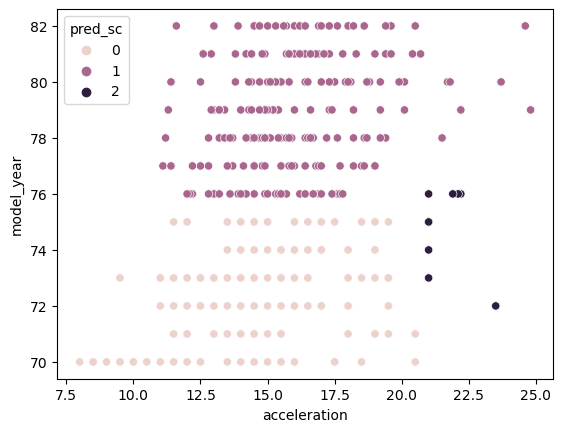

In [121]:
sns.scatterplot(data=df_pred,x='acceleration', y='model_year', hue='pred_sc')

### Other Model 2

#### Fit the Model

- To cluster 3 groups

#### Calculate Predictions

#### Create a New Column for the Predictions

#### Visualize the Model

## Achieved Goals

_Double click on **this cell** and place an `X` inside the square brackets (i.e., [X]) if you think you understand the goal:_

- [ ] Understand how the **machine optimizes a model**
    - No more than to find the best numbers for a mathematical equation
- [ ] **Residual Sum of Squares (RSS)** as a fundamental measure for the **error**. We see it on ↓
    - [Neural Networks](https://youtu.be/IHZwWFHWa-w?t=211) 
    - Linear Regression
    - Variance
- [ ] Understand the necessity to **Scale** the Data
    - For all algorithms that involves **distance calculation**.
- [ ] Understand that programming is not an end itself, but a tool to achieve the end
    - We need to understand the problem and design the solution before coding
    - But we won't need how to design the solution if we don't know how to code first
    - Solution? Apply the discipline
- [ ] There is **not a unique way to group data**. The same way it is not a unique way ↓
    - To predict a number **Regression Mathematical Equations**
    - To predict a category **Classification Mathematical Equations**

<a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-nd/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/">Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 International License</a>.